In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 패키지 설치

In [ ]:
import pandas as pd
import numpy as np

import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

import nltk
nltk.download('punkt')
nltk.download('popular')
nltk.download('tagsets')

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import collections

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    | 

# news

In [ ]:
news=pd.read_csv('/content/drive/MyDrive/DB_chips/final_data_21.csv')
news

,date,category,title,time
0,12.01,Politics,"Symone Sanders, Top Aide to Vice President Kam...",10:34 PM ET
1,12.01,Best of the Web,Pelosi and Florida,8:42 PM ET
2,12.01,Media & Marketing,"Chris Cuomo Addresses CNN Suspension, Saying ‘...",8:34 PM ET
3,12.01,U.S.,Hackers Breach Los Angeles Planned Parenthood ...,8:28 PM ET
4,12.01,Politics,Jan. 6 Panel Urges Contempt Charge for Jeffrey...,7:58 PM ET
...,...,...,...,...
35447,12.31,Essay,The Bright Side of 2022,12:01 AM ET
35448,12.31,JASON GAY,More New Year’s Resolutions You Can Actually Keep,12:01 AM ET
35449,12.31,Pepper & Salt,Pepper...and Salt,12:00 AM ET
35450,12.31,Business,Your Co-Workers Are Less Ambitious; Bosses Adj...,12:00 AM ET


In [ ]:
news.iloc[2500:2550] # 2536까지 12.31
year=['2021' for i in range(2536+1)]
for i in range(2537,len(news)):
  year.append('2022')
import collections
collections.Counter(year)

Counter({'2021': 2537, '2022': 32915})

In [ ]:
news['year']=year
news['month']=news['date'].apply(lambda x:str(x).split('.')[0].zfill(2))
news['day']=news['date'].apply(lambda x:str(x).split('.')[1])
news

,date,category,title,time,year,month,day
0,12.01,Politics,"Symone Sanders, Top Aide to Vice President Kam...",10:34 PM ET,2021,12,01
1,12.01,Best of the Web,Pelosi and Florida,8:42 PM ET,2021,12,01
2,12.01,Media & Marketing,"Chris Cuomo Addresses CNN Suspension, Saying ‘...",8:34 PM ET,2021,12,01
3,12.01,U.S.,Hackers Breach Los Angeles Planned Parenthood ...,8:28 PM ET,2021,12,01
4,12.01,Politics,Jan. 6 Panel Urges Contempt Charge for Jeffrey...,7:58 PM ET,2021,12,01
...,...,...,...,...,...,...,...
35447,12.31,Essay,The Bright Side of 2022,12:01 AM ET,2022,12,31
35448,12.31,JASON GAY,More New Year’s Resolutions You Can Actually Keep,12:01 AM ET,2022,12,31
35449,12.31,Pepper & Salt,Pepper...and Salt,12:00 AM ET,2022,12,31
35450,12.31,Business,Your Co-Workers Are Less Ambitious; Bosses Adj...,12:00 AM ET,2022,12,31


In [ ]:
d=list(news[news['day'].apply(lambda x:len(x))==1]['day'].apply(lambda x:x+'0'))
news.loc[news['day'].apply(lambda x:len(x))==1,'day']=d

In [ ]:
news['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [ ]:
news['Date']=news['year']+'-'+news['month']+'-'+news['day']

# 주가 데이터 + news

In [ ]:
sm=pd.read_csv('/content/drive/MyDrive/DB_chips/tsmc_.csv')
sm['Close_prior']=sm['Close'].shift(1)
sm['Close_diff']=sm['Close']-sm['Close_prior']
sm_=sm.iloc[1:].reset_index(drop=True)
sm_['y']=sm_['Close_diff'].apply(lambda x:1 if x>0 else 0)
sm_

,Date,Open,High,Low,Close,Adj Close,Volume,Close_prior,Close_diff,y
0,2022-01-03,619.0,632.0,618.0,631.0,604.633057,69089158,615.0,16.0,1
1,2022-01-04,645.0,656.0,644.0,656.0,628.588562,79434666,631.0,25.0,1
2,2022-01-05,669.0,669.0,646.0,650.0,622.839172,69593809,656.0,-6.0,0
3,2022-01-06,638.0,646.0,636.0,644.0,617.089844,53210211,650.0,-6.0,0
4,2022-01-07,643.0,646.0,632.0,634.0,607.507751,38249908,644.0,-10.0,0
...,...,...,...,...,...,...,...,...,...,...
241,2022-12-26,454.0,457.0,453.5,456.5,447.084564,8793306,455.0,1.5,1
242,2022-12-27,458.0,462.5,457.0,457.0,447.574249,10264001,456.5,0.5,1
243,2022-12-28,451.0,452.0,446.0,451.0,441.697998,32578949,457.0,-6.0,0
244,2022-12-29,444.0,449.5,442.5,446.0,436.801117,23020759,451.0,-5.0,0


In [ ]:
full_date=[]
month=[str(i).zfill(2) for i in range(1,13)]
day=[31,28,31,30,31,30,31,31,30,31,30,31]
for i,d in enumerate(day):
  # print(month[i])
  # print('---')
  for k in range(1,d+1):
    full_date.append('2022-'+month[i]+'-'+str(k).zfill(2))

In [ ]:
full_sm=pd.DataFrame({'Date':full_date})
samsung=pd.merge(full_sm,sm_,how='left',on='Date')
samsung

,Date,Open,High,Low,Close,Adj Close,Volume,Close_prior,Close_diff,y
0,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-03,619.0,632.0,618.0,631.0,604.633057,69089158.0,615.0,16.0,1.0
3,2022-01-04,645.0,656.0,644.0,656.0,628.588562,79434666.0,631.0,25.0,1.0
4,2022-01-05,669.0,669.0,646.0,650.0,622.839172,69593809.0,656.0,-6.0,0.0
...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,458.0,462.5,457.0,457.0,447.574249,10264001.0,456.5,0.5,1.0
361,2022-12-28,451.0,452.0,446.0,451.0,441.697998,32578949.0,457.0,-6.0,0.0
362,2022-12-29,444.0,449.5,442.5,446.0,436.801117,23020759.0,451.0,-5.0,0.0
363,2022-12-30,455.0,456.5,448.5,448.5,439.249573,21683478.0,446.0,2.5,1.0


In [ ]:
samsung['year']=samsung['Date'].apply(lambda x:x.split('-')[0])
samsung['month']=samsung['Date'].apply(lambda x:x.split('-')[1])

# 데이터 워드 임베딩

In [ ]:
jul_news=news[news['month']=='07']
jul_news

,date,category,title,time,year,month,day,Date
18857,7.01,Business,Google to Delete Abortion-Clinic Visits From L...,11:18 PM ET,2022,07,01,2022-07-01
18858,7.01,Politics,"New York Lawmakers Firm Up Gun, Abortion Rules...",9:10 PM ET,2022,07,01,2022-07-01
18859,7.01,Health,Enochian Biosciences Finds Falsified Data in S...,8:37 PM ET,2022,07,01,2022-07-01
18860,7.01,Business,Jerry Hall Files for Divorce From Rupert Murdoch,8:12 PM ET,2022,07,01,2022-07-01
18861,7.01,Politics,Biden Seeks to Block New Offshore Drilling in ...,7:25 PM ET,2022,07,01,2022-07-01
...,...,...,...,...,...,...,...,...
21693,7.31,Tech,The U.S. Is Investing Big in Chips. So Is the ...,5:30 AM ET,2022,07,31,2022-07-31
21694,7.31,Economy,Falling Food Prices Ease Upward Pressure on Gl...,5:30 AM ET,2022,07,31,2022-07-31
21695,7.31,Turning Points,"Reconnected After Years, College Friends Find ...",5:30 AM ET,2022,07,31,2022-07-31
21696,7.31,Finance,Investors’ Love of Tech Stocks Shows No Signs ...,5:30 AM ET,2022,07,31,2022-07-31


In [ ]:
parse_text='\n'.join(list(jul_news['title'].apply(lambda x:str(x).lower())))
# parse_text
content_text = re.sub(r'\([^)]*\)', '', parse_text)
sent_text = sent_tokenize(content_text) # 문장 토큰화
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)
# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 233


In [ ]:
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=2, workers=4, sg=0)

In [ ]:
samsung_wd=model.wv.most_similar('taiwan',topn=1500) # 0.85 이상
# samsung_wd
sam_wd=[wd for wd, score in samsung_wd if score>=0.95]
len(sam_wd)

1211

In [ ]:
pos_tag=nltk.pos_tag(sam_wd)

print(set([j for i,j in pos_tag]))
need_pos=['JJ', 'NN','NNP','NNPS','NNS','RP','VB','VBD','VBG','VBN','VBP','VBZ']
pos1=[i for i,j in pos_tag if j in need_pos]
print(len(pos1))

{'VBP', 'RBR', 'VBD', 'RP', 'VBZ', 'CD', 'JJ', 'NN', 'IN', 'PRP', 'FW', 'CC', 'JJR', 'WP', 'VBG', 'NNP', 'MD', 'JJS', 'PRP$', 'WRB', 'NNS', 'DT', 'TO', 'RB', 'VB', 'RBS', 'VBN'}
1041


In [ ]:
model.build_vocab(['samsung'],update=True)

In [ ]:
model.wv.vectors

array([[-4.95048106e-01,  8.65656972e-01,  1.66169032e-01, ...,
        -4.86214906e-01,  9.68285799e-02,  1.62455618e-01],
       [-4.73977685e-01,  8.18271518e-01,  1.55519277e-01, ...,
        -4.53205258e-01,  7.82467648e-02,  1.50811598e-01],
       [-4.29301292e-01,  7.54310012e-01,  1.33469671e-01, ...,
        -4.14496809e-01,  9.12464261e-02,  1.28281817e-01],
       ...,
       [-1.14219720e-02,  1.77885778e-02,  6.57709921e-03, ...,
        -1.30295688e-02,  1.09775858e-02, -3.62128415e-03],
       [ 2.22775643e-03,  1.45579055e-02, -1.64545130e-03, ...,
        -8.47385637e-03,  2.60541704e-03, -8.23314115e-03],
       [-4.77405265e-04,  1.19369961e-02, -7.86076393e-03, ...,
        -1.37155671e-02,  9.01352614e-03, -8.00076639e-04]], dtype=float32)

In [ ]:
# model.wv.index_to_key[-1]
# 'intel' in model.wv.index_to_key

In [ ]:
# 자주등장하는 단어
wd_freq=dict()
tit='\n'.join(jul_news['title'].apply(lambda x:x.lower()))
for wd in pos1:
  wd_freq[wd]=tit.count(wd)
wd_freq1=sorted(wd_freq.items(),key=lambda x:x[1],reverse=True)

In [ ]:
stop_wd=['e','s','i','t','r','n','l','c','u','m','p','g','k','v','is','am','are','j','do','does','did','has','have','had']
pos2=[] # 불용어 제외
for p in pos1:
  if p in stop_wd:
    continue
  else:
    pos2.append(p)

In [ ]:
len(pos2)

1024

# r=1

In [ ]:
r=1
date_lst=list(news['Date'].unique())

start_indx=[i for i,v in enumerate(date_lst) if v=='2022-07-01'][0]
end_indx=[i for i,v in enumerate(date_lst) if v=='2022-07-31'][-1]

r_lst=[]

for i in range(start_indx,end_indx+1):
  r_lst.append(date_lst[i-r+1:i+1])
r_lst

[['2022-07-01'],
 ['2022-07-02'],
 ['2022-07-03'],
 ['2022-07-04'],
 ['2022-07-05'],
 ['2022-07-06'],
 ['2022-07-07'],
 ['2022-07-08'],
 ['2022-07-09'],
 ['2022-07-10'],
 ['2022-07-11'],
 ['2022-07-12'],
 ['2022-07-13'],
 ['2022-07-14'],
 ['2022-07-15'],
 ['2022-07-16'],
 ['2022-07-17'],
 ['2022-07-18'],
 ['2022-07-19'],
 ['2022-07-20'],
 ['2022-07-21'],
 ['2022-07-22'],
 ['2022-07-23'],
 ['2022-07-24'],
 ['2022-07-25'],
 ['2022-07-26'],
 ['2022-07-27'],
 ['2022-07-28'],
 ['2022-07-29'],
 ['2022-07-30'],
 ['2022-07-31']]

In [ ]:
# 날짜별 단어 등장 횟수
total_freq=[]

for i in range(len(r_lst)):
  wd_freq2=dict()
  titles=news[news['Date'].isin(r_lst[i])]['title'].apply(lambda x:str(x).lower())
  g='\n'.join(titles)#[['Date','title']]
  for wd in pos2:
    wd_freq2[wd]=g.count(wd)
  total_freq.append(wd_freq2)

In [ ]:
samsung_=samsung[samsung['month']=='07'][['Date','y']].reset_index(drop=True)
# samsung_
y0_indx=list(samsung_[samsung_['y']==0].index)
y1_indx=list(samsung_[samsung_['y']==1].index)

In [ ]:
print(len(y0_indx))
print(len(y1_indx))

9
12


In [ ]:
y0_news=[total_freq[i] for i in y0_indx]
y1_news=[total_freq[i] for i in y1_indx]

In [ ]:
y0_dic=dict()
for dic in y0_news:
  for k in dic:
    if k in y0_dic:
      y0_dic[k]+=dic[k]
    else:
      y0_dic[k]=dic[k]
len(y0_dic)

946

In [ ]:
y1_dic=dict()
for dic in y1_news:
  for k in dic:
    if k in y1_dic:
      y1_dic[k]+=dic[k]
    else:
      y1_dic[k]=dic[k]
len(y1_dic)

946

In [ ]:
# 알파벳 순서대로 정렬
y0=sorted(y0_dic.items(),key=lambda x:x[0])
y1=sorted(y1_dic.items(),key=lambda x:x[0])

In [ ]:
word=[i for i,j in y0]
cnt=[j for i,j in y0]
y0_df=pd.DataFrame({'word':word,'cnt':cnt,'trend':'Trend0'})

word=[i for i,j in y1]
cnt=[j for i,j in y1]
y1_df=pd.DataFrame({'word':word,'cnt':cnt,'trend':'Trend1'})
word_df=pd.concat([y0_df,y1_df])
word_df

,word,cnt,trend
0,abe,5,Trend0
1,abortion,19,Trend0
2,access,1,Trend0
3,act,24,Trend0
4,ad,130,Trend0
...,...,...,...
941,year,21,Trend1
942,years,9,Trend1
943,yellen,4,Trend1
944,york,4,Trend1


In [ ]:
pos2_ord=sorted(pos2)
pos_indx={word:i for i,word in enumerate(pos2_ord)}
word_df['word_indx']=word_df['word'].apply(lambda x:pos_indx[x])
word_df

,word,cnt,trend,word_indx
0,abe,5,Trend0,0
1,abortion,19,Trend0,1
2,access,1,Trend0,2
3,act,24,Trend0,3
4,ad,130,Trend0,4
...,...,...,...,...
941,year,21,Trend1,941
942,years,9,Trend1,942
943,yellen,4,Trend1,943
944,york,4,Trend1,944


Text(0.5, 0, 'word')

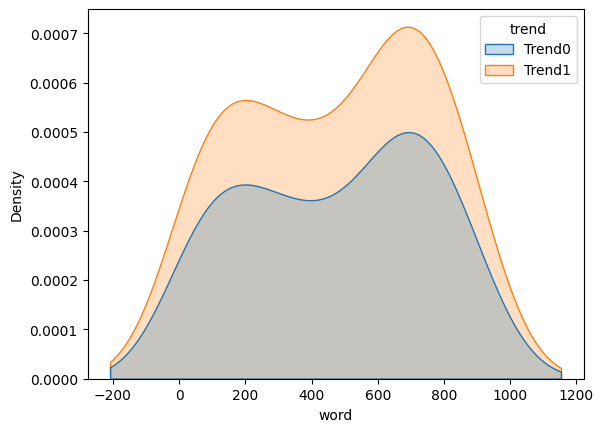

In [ ]:
sns.kdeplot(data=word_df, x='word_indx', hue='trend', weights='cnt', fill=True)
plt.xlabel('word')

In [ ]:
g0=word_df[word_df['trend']=='Trend0'][['word','cnt']]
g1=word_df[word_df['trend']=='Trend1'][['word','cnt']]
g0.rename(columns={'cnt':'cnt0'},inplace=True)
g1.rename(columns={'cnt':'cnt1'},inplace=True)
gg=pd.merge(g0,g1,on='word',how='left')
gg['cnt_dif']=gg['cnt0']-gg['cnt1']
gg

,word,cnt0,cnt1,cnt_dif
0,abe,5,17,-12
1,abortion,19,21,-2
2,access,1,6,-5
3,act,24,24,0
4,ad,130,186,-56
...,...,...,...,...
941,year,17,21,-4
942,years,4,9,-5
943,yellen,2,4,-2
944,york,14,4,10


In [ ]:
Q1 = np.percentile(gg['cnt_dif'], 25)
Q3 = np.percentile(gg['cnt_dif'], 75)
print(Q1)
print(Q3)

-4.0
0.0


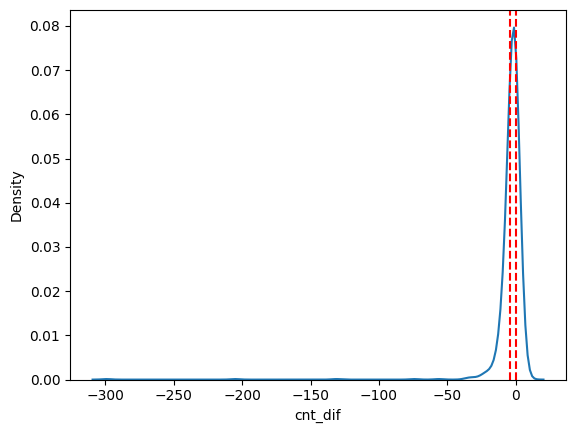

In [ ]:
sns.kdeplot(gg['cnt_dif'])
plt.axvline(x=Q1, color='r', linestyle='--')
plt.axvline(x=Q3, color='r', linestyle='--')

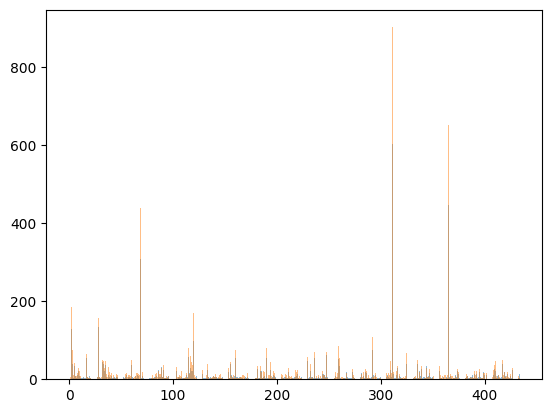

In [ ]:
f_df=gg[(gg['cnt_dif']<Q1) | (gg['cnt_dif']>Q3) ]
word_=list(f_df['word'])
word_.extend(list(f_df['word']))
cnt_=list(f_df['cnt0'])
cnt_.extend(list(f_df['cnt1']))
trend_=['Trend0' for _ in range(len(f_df['cnt0']))]
trend_.extend(['Trend1' for _ in range(len(f_df['cnt1']))])
f_=pd.DataFrame({'word':word_, 'cnt':cnt_, 'trend':trend_})
w_idx=[i for i in range(len(f_df['word']))]
w_idx.extend([i for i in range(len(f_df['word']))])
f_['word_indx']=w_idx

p1=plt.bar(f_.loc[f_['trend']=='Trend0', 'word_indx'],f_.loc[f_['trend']=='Trend0', 'cnt'],alpha=0.5)
p2=plt.bar(f_.loc[f_['trend']=='Trend1', 'word_indx'],f_.loc[f_['trend']=='Trend1', 'cnt'],alpha=0.5)
plt.show()

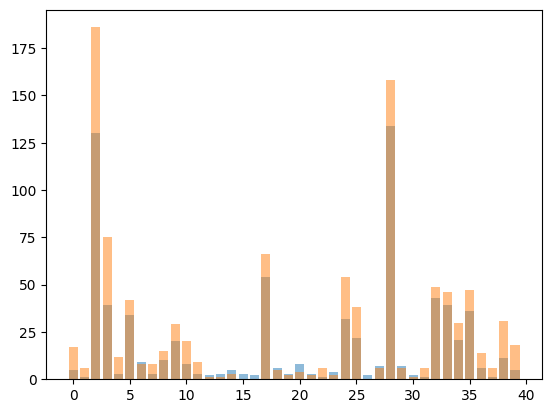

In [ ]:
p1=plt.bar(f_.loc[(f_['trend']=='Trend0') & (f_['word_indx'].isin([i for i in range(40)])), 'word_indx'],
           f_.loc[(f_['trend']=='Trend0') & (f_['word_indx'].isin([i for i in range(40)])), 'cnt'],alpha=0.5)
p2=plt.bar(f_.loc[(f_['trend']=='Trend1') &  (f_['word_indx'].isin([i for i in range(40)])), 'word_indx'],
           f_.loc[(f_['trend']=='Trend1') &  (f_['word_indx'].isin([i for i in range(40)])), 'cnt'],alpha=0.5)
plt.show()

# 클러스터링


In [ ]:
# model.wv.vectors

In [ ]:
# model.wv.index_to_key

In [ ]:
sam_vec=dict()

for idx,wd in enumerate(model.wv.index_to_key):
  if wd in list(gg['word']):
    sam_vec[wd]=model.wv.vectors[idx]
# sam_vec.values()

In [ ]:
len(sam_vec)

946

In [ ]:
# vec_arr=np.array([])
vec_arr=np.array(list(sam_vec.values())[0]) # 100
vec_arr
for vec in list(sam_vec.values()):
  vec_arr=np.vstack([vec_arr,np.array(vec)])

  # vec_arr=vec_arr.append(vec_arr,vec)
print(type(vec_arr))

<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

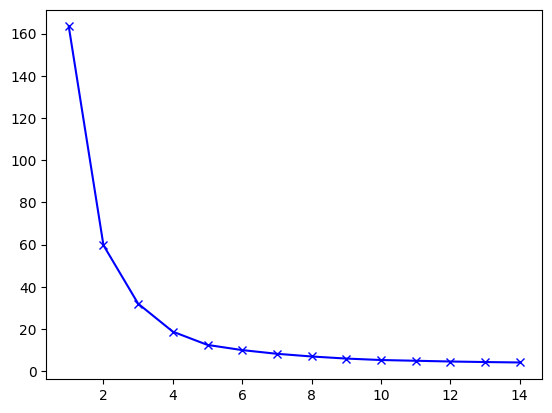

In [ ]:
n_clusters=15
cost=[]
for i in range(1,n_clusters):
  kmean=KMeans(n_clusters=i, init='k-means++',max_iter=1000)
  kmean.fit(vec_arr)
  cost.append(kmean.inertia_)
plt.plot([i for i in range(1,n_clusters)],cost,'bx-')

In [ ]:
n=4
kmean=KMeans(n_clusters=n, init='k-means++',max_iter=1000, random_state=2024)
kmean.fit(vec_arr)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=4, random_state=2024)

In [ ]:

collections.Counter(kmean.labels_)

Counter({2: 22, 1: 88, 3: 270, 0: 567})

In [ ]:
# kmean.labels_
# sam_vec

cl0=[]
cl1=[]
cl2=[]
cl3=[]
for wd, cl in zip(sam_vec.keys(),kmean.labels_):
  if cl==0:
    cl0.append(wd)
  elif cl==1:
    cl1.append(wd)
  elif cl==2:
    cl2.append(wd)
  elif cl==3:
    cl3.append(wd)

In [ ]:
print(set(cl0))
print(set(cl1))
print(set(cl2))
print(set(cl3))

{'managers', 'trends', 'vehicle', 'remains', 'much', 'building', 'miami', 'contract', 'shooter', 'decision', 'seek', 'stage', 'profits', 'poised', 'netherlands', 'liz', 'defense', 'project', 'brands', 'red', 'fell', 'manhattan', 'colorado', 'cyber', 'bernie', 'founder', 'noonan', 'plot', 'residential', 'agency', 'fund', 'congressional', 'network', 'biotech', 'charged', 'approves', 'wall', 'see', 'arms', 'brittney', 'history', 'fades', 'era', 'airport', 'supplies', 'jayland', 'kansas', 'fast', 'aims', 'conservatives', 'tells', 'gap', 'exchange', 'pilots', 'reach', 'turned', 'offer', 'wars', 'lockdown', 'slip', 'finance', 'griner', 'stars', 'steps', 'fashion', 'resigns', 'digital', 'kill', 'webb', 'elliott', 'protests', 'macron', 'area', 'fresh', 'rival', 'pill', 'uber', 'files', 'past', 'questions', 'breaks', 'arizona', 'recovery', 'lending', 'capital', 'plant', 'shortage', 'champion', 'germany', 'justice', 'homes', 'list', 'rises', 'system', 'rack', 'communist', 'historic', 'republican

In [ ]:
cluster=['cluster0' for _ in range(len(set(cl0)))]
word=list(set(cl0))

cluster.extend(['cluster1' for _ in range(len(set(cl1)))])
word.extend(list(set(cl1)))

cluster.extend(['cluster2' for _ in range(len(set(cl2)))])
word.extend(list(set(cl2)))

cluster.extend(['cluster3' for _ in range(len(set(cl3)))])
word.extend(list(set(cl3)))

print(len(cluster))
print(len(word))
print(word)
cluster_df=pd.DataFrame({ 'word':word,'cluster':cluster})
cluster_df.iloc[len(cl0)-1: len(cl0)+2]
# cluster_df.to_csv('/content/drive/MyDrive/DB_chips/word_cluster_tsmc.csv',index=False)

946
946
['managers', 'trends', 'vehicle', 'remains', 'much', 'building', 'miami', 'contract', 'shooter', 'decision', 'seek', 'stage', 'profits', 'poised', 'netherlands', 'liz', 'defense', 'project', 'brands', 'red', 'fell', 'manhattan', 'colorado', 'cyber', 'bernie', 'founder', 'noonan', 'plot', 'residential', 'agency', 'fund', 'congressional', 'network', 'biotech', 'charged', 'approves', 'wall', 'see', 'arms', 'brittney', 'history', 'fades', 'era', 'airport', 'supplies', 'jayland', 'kansas', 'fast', 'aims', 'conservatives', 'tells', 'gap', 'exchange', 'pilots', 'reach', 'turned', 'offer', 'wars', 'lockdown', 'slip', 'finance', 'griner', 'stars', 'steps', 'fashion', 'resigns', 'digital', 'kill', 'webb', 'elliott', 'protests', 'macron', 'area', 'fresh', 'rival', 'pill', 'uber', 'files', 'past', 'questions', 'breaks', 'arizona', 'recovery', 'lending', 'capital', 'plant', 'shortage', 'champion', 'germany', 'justice', 'homes', 'list', 'rises', 'system', 'rack', 'communist', 'historic', 're

In [ ]:
# gg[gg['word'].isin(cl0)]['cnt_dif'].mean()

-2.892226148409894


<Axes: xlabel='cnt_dif', ylabel='Count'>

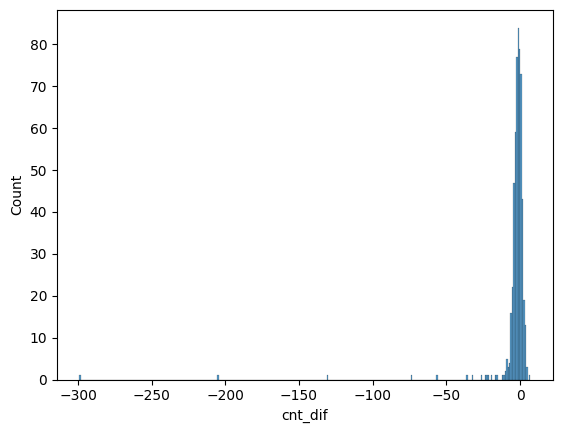

In [ ]:
print(gg[gg['word'].isin(cl0)]['cnt_dif'].mean())
sns.histplot(gg[gg['word'].isin(cl0)]['cnt_dif'])

Text(0.5, 0, 'word')

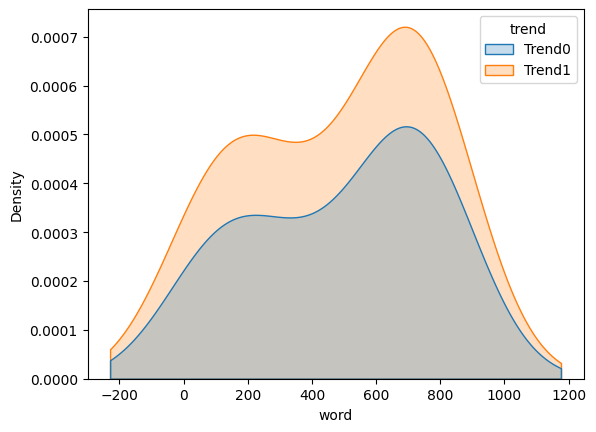

In [ ]:
sns.kdeplot(data=word_df[word_df['word'].isin(cl0)], x='word_indx', hue='trend', weights='cnt', fill=True)
plt.xlabel('word')

-6.238636363636363


<Axes: xlabel='cnt_dif', ylabel='Count'>

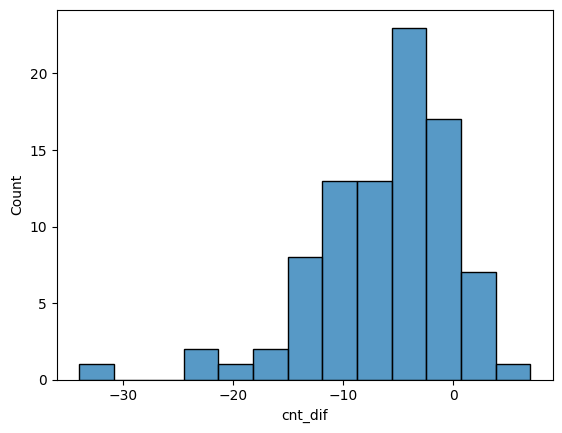

In [ ]:
print(gg[gg['word'].isin(cl1)]['cnt_dif'].mean())
sns.histplot(gg[gg['word'].isin(cl1)]['cnt_dif'])

Text(0.5, 0, 'word')

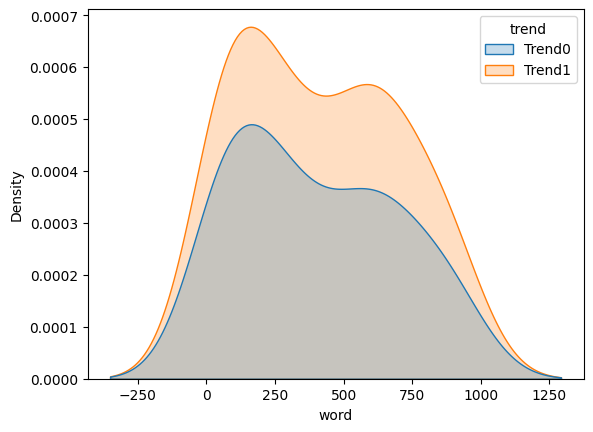

In [ ]:
sns.kdeplot(data=word_df[word_df['word'].isin(cl1)], x='word_indx', hue='trend', weights='cnt', fill=True)
plt.xlabel('word')

-10.409090909090908


<Axes: xlabel='cnt_dif', ylabel='Count'>

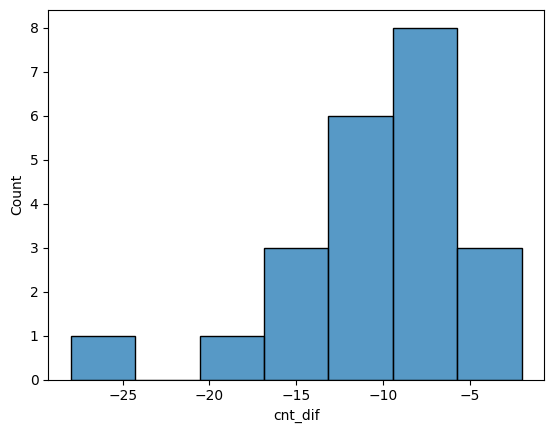

In [ ]:
print(gg[gg['word'].isin(cl2)]['cnt_dif'].mean())
sns.histplot(gg[gg['word'].isin(cl2)]['cnt_dif'])

Text(0.5, 0, 'word')

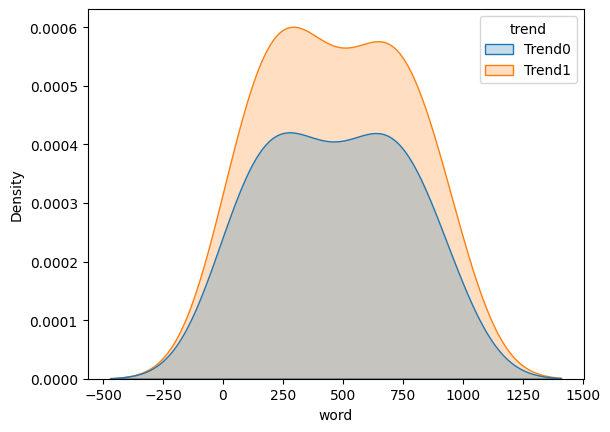

In [ ]:
sns.kdeplot(data=word_df[word_df['word'].isin(cl2)], x='word_indx', hue='trend', weights='cnt', fill=True)
plt.xlabel('word')

-3.359259259259259


<Axes: xlabel='cnt_dif', ylabel='Count'>

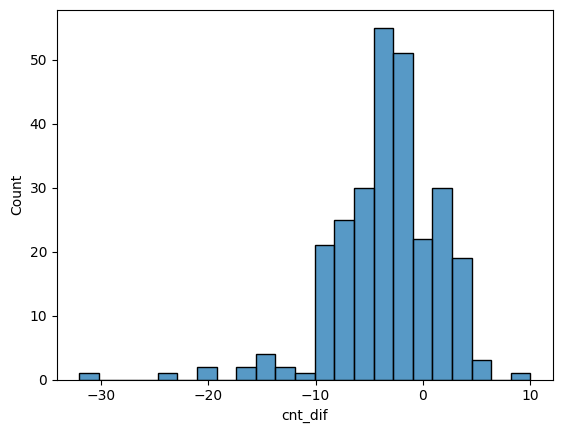

In [ ]:
print(gg[gg['word'].isin(cl3)]['cnt_dif'].mean())
sns.histplot(gg[gg['word'].isin(cl3)]['cnt_dif'])

Text(0.5, 0, 'word')

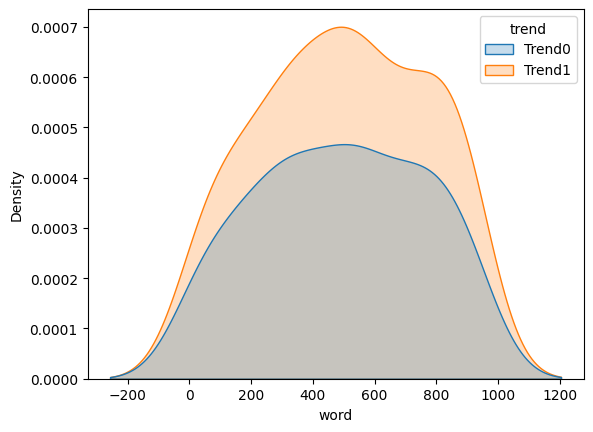

In [ ]:
sns.kdeplot(data=word_df[word_df['word'].isin(cl3)], x='word_indx', hue='trend', weights='cnt', fill=True)
plt.xlabel('word')

In [ ]:
set(cl1)

{'abe',
 'airlines',
 'amazon',
 'america',
 'american',
 'bank',
 'banks',
 'be',
 'bill',
 'books',
 'business',
 'buy',
 'california',
 'case',
 'ceo',
 'chinese',
 'chip',
 'claims',
 'climate',
 'companies',
 'court',
 'crypto',
 'data',
 'demand',
 'democrats',
 'dollar',
 'down',
 'earnings',
 'economic',
 'economy',
 'elon',
 'end',
 'energy',
 'face',
 'fall',
 'first',
 'global',
 'growth',
 'heat',
 'high',
 'hit',
 'hits',
 'home',
 'house',
 'jan',
 'johnson',
 'long',
 'look',
 'market',
 'markets',
 'money',
 'national',
 'next',
 'oil',
 'out',
 'people',
 'pepper',
 'plan',
 'plans',
 'police',
 'power',
 'president',
 'profit',
 'putin',
 'rate',
 'rates',
 'recession',
 'record',
 'rise',
 'sales',
 'salt',
 'senate',
 'shooting',
 'spending',
 'state',
 'stocks',
 'summer',
 'supreme',
 'take',
 'tax',
 'tech',
 'trade',
 'twitter',
 'was',
 'week',
 'won',
 'workers',
 'year'}

In [ ]:
set(cl2)

{'abortion',
 'biden',
 'big',
 'china',
 'covid',
 'deal',
 'europe',
 'fed',
 'gas',
 'get',
 'inflation',
 'investors',
 'musk',
 'new',
 'prices',
 'review',
 'russia',
 'russian',
 'says',
 'ukraine',
 'war',
 'world'}

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/DB_chips/word_cluster.csv',index=False)
cluster_df=pd.read_csv('/content/drive/MyDrive/DB_chips/word_cluster_tsmc.csv')
cluster_df

,word,cluster
0,managers,cluster0
1,trends,cluster0
2,vehicle,cluster0
3,remains,cluster0
4,much,cluster0
...,...,...
941,doesn,cluster3
942,prime,cluster3
943,faces,cluster3
944,primary,cluster3


In [ ]:
# cluster_df[cluster_df['word']=='raise']
# 나중에 추가할 것

In [ ]:
word_lst=list(cluster_df.loc[(cluster_df['cluster']=='cluster1') | (cluster_df['cluster']=='cluster2'),'word'])
print(len(word_lst))


110


In [ ]:
word_lst[90:]

['russia',
 'investors',
 'review',
 'get',
 'gas',
 'musk',
 'prices',
 'biden',
 'abortion',
 'world',
 'new',
 'china',
 'ukraine',
 'war',
 'fed',
 'inflation',
 'deal',
 'big',
 'europe',
 'covid']

In [ ]:
not_need=['bank','climate','end','police','look','court','plans','stocks','abe','energy','people','companies','sales','house','out','was','dollar','workers',
 'heat','global','markets','summer','data','market','pepper', 'hits',
 'johnson','record','year', 'long','next', 'claims','money','airlines','rate','tax','power','won','first','rates','books','buy','senate','business','economy','supreme','elon','economic',
  'case','demand','week','be','ceo','state','face','plan','earnings','putin','president','hit','bill','banks','california','jan','home','shooting','crypto','profit','take','spending','says',
  'investors',
 'review',
 'get',
 'gas',
 'musk',
 'prices','abortion',
 'world','fed',
 'new','deal',
 'big',
]

In [ ]:
print(len(word_lst))
print(len(not_need))
print(len(word_lst)-len(not_need))

110
83
27


- boris johnson: 영국의 총리
- joe manchin: 미국 상원의원

In [ ]:
# te_[te_['word']=='vote']

In [ ]:
# word_lst=cl2
# word_lst.extend(cl3)
# word_lst

# te=gg[gg['word'].isin(word_lst)].reset_index(drop=True)#.groupby('word')[['cnt0','cnt1']].sum()
# te['total_cnt']=te['cnt0']+te['cnt1']
# te['cnt_dif_abs']=te['cnt_dif'].apply(lambda x:abs(x))
# te_=te.sort_values(['cnt_dif_abs'])
# te_[te['word']=='supreme']

 - 결과 단어
  - up, down, rise, fall

In [ ]:
# sam_vec['tesla']

In [ ]:
# word_lst

In [ ]:
embedding=dict()
for k,v in zip(model.wv.index_to_key, model.wv.vectors):
  embedding[k]=v

In [ ]:
# sam_vec
final_wd=[]
vec=[]
for wd in list(set(word_lst)):
  if wd in not_need:
    continue
  else:
    final_wd.append(wd)
    vec.append(embedding[wd])

In [ ]:
print(len(final_wd))
print(len(vec))

27
27


In [ ]:
sorted(final_wd) # american, americans, earnings,

['amazon',
 'america',
 'american',
 'biden',
 'china',
 'chinese',
 'chip',
 'covid',
 'democrats',
 'down',
 'europe',
 'fall',
 'growth',
 'high',
 'inflation',
 'national',
 'oil',
 'recession',
 'rise',
 'russia',
 'russian',
 'salt',
 'tech',
 'trade',
 'twitter',
 'ukraine',
 'war']

In [ ]:
# sam_vec['samsung']

In [ ]:
print(len(final_wd))
print(len(vec))


all_wd=list(model.wv.index_to_key)
all_vec=list(model.wv.vectors)
# 추가해야할 것: down, fall


add=['up']

for i,k in enumerate(all_wd):
  if k in add:
    final_wd.append(k)
    vec.append(all_vec[i])

27
27


In [ ]:
print(len(final_wd))
print(len(vec))

28
28


In [ ]:
final_wd

['chinese',
 'america',
 'russian',
 'russia',
 'amazon',
 'oil',
 'twitter',
 'tech',
 'chip',
 'china',
 'war',
 'inflation',
 'democrats',
 'national',
 'recession',
 'biden',
 'high',
 'down',
 'ukraine',
 'fall',
 'growth',
 'rise',
 'salt',
 'american',
 'trade',
 'europe',
 'covid',
 'up']

In [ ]:
vec_df=pd.DataFrame(vec)
vec_df=pd.DataFrame(vec)
vec_df_=vec_df.T
vec_df_.columns=final_wd
vec_df_

,chinese,america,russian,russia,amazon,oil,twitter,tech,chip,china,...,ukraine,fall,growth,rise,salt,american,trade,europe,covid,up
0,-0.113079,-0.092969,-0.164853,-0.234743,-0.129045,-0.104704,-0.174945,-0.159468,-0.108422,-0.259604,...,-0.226257,-0.076443,-0.091915,-0.118279,-0.108153,-0.102133,-0.091427,-0.190551,-0.224215,-0.247907
1,0.215435,0.162722,0.318580,0.429559,0.234361,0.181739,0.322298,0.289908,0.198901,0.464761,...,0.403345,0.162677,0.184771,0.221526,0.208059,0.164880,0.151639,0.334502,0.431325,0.430476
2,0.038843,0.038284,0.067804,0.100003,0.059622,0.047134,0.067155,0.064221,0.047143,0.109699,...,0.097296,0.035643,0.038122,0.060547,0.055733,0.042826,0.042338,0.073731,0.088013,0.097608
3,0.053444,0.033054,0.080392,0.119726,0.060762,0.050010,0.088112,0.065678,0.057663,0.128498,...,0.099235,0.041740,0.055037,0.067054,0.057985,0.041976,0.035875,0.078691,0.109605,0.121507
4,0.016190,0.002498,0.016663,0.016757,0.011536,0.018184,0.007943,0.011612,0.010408,0.018533,...,0.009862,0.010656,0.015025,0.003875,0.014847,0.001089,0.001935,0.015961,0.015633,0.021130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.143081,0.115850,0.218227,0.302313,0.163009,0.130973,0.222932,0.203562,0.131040,0.329090,...,0.272129,0.097491,0.134433,0.160855,0.140169,0.109691,0.108799,0.243145,0.295366,0.311809
96,0.088647,0.068065,0.117302,0.161848,0.083415,0.069419,0.129488,0.115959,0.086688,0.189682,...,0.170090,0.062379,0.063537,0.091640,0.082545,0.069941,0.063978,0.132597,0.172640,0.170188
97,-0.099519,-0.066950,-0.157064,-0.207452,-0.118265,-0.090629,-0.150483,-0.145567,-0.103146,-0.211685,...,-0.202208,-0.075471,-0.090895,-0.100604,-0.102102,-0.082287,-0.079168,-0.165120,-0.191510,-0.219592
98,0.031114,0.015796,0.048498,0.059189,0.043395,0.026507,0.060518,0.049051,0.039990,0.080717,...,0.070130,0.015364,0.034730,0.026721,0.044722,0.028446,0.031006,0.046695,0.066002,0.065415


In [ ]:
# vec_df=pd.DataFrame(vec)
# vec_df_=vec_df.T
# vec_df_.columns=final_wd
# vec_df_
# vec_df.set_index(final_wd,drop=False)

In [ ]:
vec_df_.columns

Index(['chinese', 'america', 'russian', 'russia', 'amazon', 'oil', 'twitter',
       'tech', 'chip', 'china', 'war', 'inflation', 'democrats', 'national',
       'recession', 'biden', 'high', 'down', 'ukraine', 'fall', 'growth',
       'rise', 'salt', 'american', 'trade', 'europe', 'covid', 'up'],
      dtype='object')

# 인과 추론-FGES

In [ ]:
import numpy as np
from itertools import combinations
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 독립성 검정을 위한 함수
def independence_test(X, y, alpha=0.05):
    p_values = []
    n_features = X.shape[1]
    for i in range(n_features):
        X_i = np.delete(X, i, axis=1)
        p_value = mutual_info_regression(X_i, X[:, i])[0]
        p_values.append(p_value)
    p_values = np.array(p_values)
    return (p_values < alpha).all()

# FGES 알고리즘
def fges_algorithm(data):
    # 초기 그래프 구성
    graph = np.zeros((data.shape[1], data.shape[1]), dtype=bool)

    # 독립성 검정을 통한 초기 엣지 설정
    p_values = independence_test(data[:, :-1], data[:, -1])
    graph[:-1, -1] = p_values

    # 초기 엣지 후보군 생성
    candidate_edges = list(combinations(range(data.shape[1]), 2))

    # 독립성 검정을 통한 엣지 추가
    for edge in candidate_edges:
        if not graph[edge[0], edge[1]]:
            X = data[:, [edge[0], edge[1]]]
            y = data[:, list(set(range(data.shape[1])) - set(edge))]
            p_value = independence_test(X, y)
            if p_value:
                graph[edge[0], edge[1]] = True

    return graph

In [ ]:
# # # 예시 데이터
# data = np.array([
#     [1, 0, 1],
#     [0, 1, 1],
#     [1, 1, 0],
#     [0, 0, 0]
# ])

# # FGES 알고리즘 적용
# causal_graph = fges_algorithm(np.array(data))

# print("Causal Graph Edges:")
# print(causal_graph)

In [ ]:
# nat_df=vec_df_.loc[:,['chip','russia','biden','japan','china','america','ukraine','europe']]
# t=nat_df.sample(n=10,random_state=1010)
# causal_graph = fges_algorithm(np.array(t))

# print("Causal Graph Edges:")
# print(causal_graph)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# nat_df=vec_df_.loc[:,['chip','russia','biden','japan','china','america','ukraine','europe']]
# nat_df.T


# min_max_scaler = MinMaxScaler()
# fitted = min_max_scaler.fit(nat_df.T)
# nat_df_ = min_max_scaler.transform(nat_df.T)

# # pd.DataFrame(nat_df_)
# ttt=pd.DataFrame(nat_df_.T,columns=['chip','russia','biden','japan','china','america','ukraine','europe'])
# ttt
# causal_graph = fges_algorithm(np.array(nat_df))

# print("Causal Graph Edges:")
# print(causal_graph)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
nat_df=vec_df_.copy()
# nat_df.T


min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(nat_df.T)
nat_df_ = min_max_scaler.transform(nat_df.T)

# pd.DataFrame(nat_df_)
ttt=pd.DataFrame(nat_df_.T,columns=nat_df.columns)
ttt
# causal_graph = fges_algorithm(np.array(nat_df))

# print("Causal Graph Edges:")
# print(causal_graph)

,chinese,america,russian,russia,amazon,oil,twitter,tech,chip,china,...,ukraine,fall,growth,rise,salt,american,trade,europe,covid,up
0,0.800071,0.909812,0.517533,0.136133,0.712944,0.845774,0.462460,0.546922,0.825486,0.000461,...,0.182444,1.000000,0.915568,0.771692,0.826952,0.859803,0.918227,0.377294,0.193585,0.064294
1,0.196445,0.034126,0.514059,0.855796,0.254724,0.092685,0.525507,0.425770,0.145534,0.964194,...,0.775076,0.033990,0.102021,0.215202,0.173732,0.040772,0.000000,0.563088,0.861234,0.858620
2,0.041348,0.034132,0.415599,0.831686,0.309863,0.148488,0.407211,0.369295,0.148612,0.956986,...,0.796711,0.000000,0.032042,0.321821,0.259607,0.092822,0.086520,0.492186,0.676752,0.800736
3,0.200171,0.000000,0.464721,0.850867,0.272010,0.166460,0.540512,0.320272,0.241589,0.936981,...,0.649701,0.085277,0.215813,0.333785,0.244751,0.087591,0.027699,0.448021,0.751505,0.868349
4,0.516382,0.048183,0.532547,0.535757,0.357225,0.584557,0.234350,0.359811,0.318657,0.596503,...,0.299978,0.327123,0.476526,0.095267,0.470456,0.000000,0.028909,0.508537,0.497330,0.685284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.193538,0.077938,0.512548,0.869513,0.278139,0.142140,0.532522,0.450295,0.142425,0.983184,...,0.741373,0.000000,0.156829,0.268993,0.181176,0.051792,0.048004,0.618334,0.840022,0.909823
96,0.206343,0.044670,0.431436,0.781357,0.165243,0.055305,0.527166,0.420888,0.190960,1.000000,...,0.846105,0.000000,0.009100,0.229857,0.158413,0.059401,0.012561,0.551583,0.866135,0.846869
97,0.796529,1.000000,0.437025,0.122232,0.679412,0.852070,0.478137,0.508850,0.773865,0.095784,...,0.154990,0.946764,0.850405,0.789751,0.780390,0.904185,0.923667,0.386690,0.221827,0.046390
98,0.240993,0.006605,0.507000,0.670583,0.428908,0.170509,0.690927,0.515466,0.376811,1.000000,...,0.838003,0.000000,0.296330,0.173774,0.449214,0.200178,0.239347,0.479407,0.774842,0.765853


In [ ]:
ttt.columns

Index(['chinese', 'america', 'russian', 'russia', 'amazon', 'oil', 'twitter',
       'tech', 'chip', 'china', 'war', 'inflation', 'democrats', 'national',
       'recession', 'biden', 'high', 'down', 'ukraine', 'fall', 'growth',
       'rise', 'salt', 'american', 'trade', 'europe', 'covid', 'up'],
      dtype='object')

In [ ]:
# ttt.iloc[:,12]

In [ ]:
col_lst=list(ttt.columns)
print(len(col_lst))

28


In [ ]:
# nat_df=vec_df_.loc[:,['chip','russia','biden','japan','china','america','ukraine','europe']]
col_lst=list(ttt.columns)
print(len(col_lst))
ttt.loc[:,col_lst[0]]=ttt.loc[:,col_lst[0]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[1]]=ttt.loc[:,col_lst[1]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[2]]=ttt.loc[:,col_lst[2]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[3]]=ttt.loc[:,col_lst[3]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[4]]=ttt.loc[:,col_lst[4]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[5]]=ttt.loc[:,col_lst[5]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[6]]=ttt.loc[:,col_lst[6]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[7]]=ttt.loc[:,col_lst[7]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[8]]=ttt.loc[:,col_lst[8]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[9]]=ttt.loc[:,col_lst[9]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[10]]=ttt.loc[:,col_lst[10]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[11]]=ttt.loc[:,col_lst[11]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[12]]=ttt.loc[:,col_lst[12]].apply(lambda x:1 if x>0.5 else 0)

ttt.loc[:,col_lst[13]]=ttt.loc[:,col_lst[13]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[14]]=ttt.loc[:,col_lst[14]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[15]]=ttt.loc[:,col_lst[15]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[16]]=ttt.loc[:,col_lst[16]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[17]]=ttt.loc[:,col_lst[17]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[18]]=ttt.loc[:,col_lst[18]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[19]]=ttt.loc[:,col_lst[19]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[20]]=ttt.loc[:,col_lst[20]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[21]]=ttt.loc[:,col_lst[21]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[22]]=ttt.loc[:,col_lst[22]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[23]]=ttt.loc[:,col_lst[23]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[24]]=ttt.loc[:,col_lst[24]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[25]]=ttt.loc[:,col_lst[25]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[26]]=ttt.loc[:,col_lst[26]].apply(lambda x:1 if x>0.5 else 0)
ttt.loc[:,col_lst[27]]=ttt.loc[:,col_lst[27]].apply(lambda x:1 if x>0.5 else 0)
# ttt.loc[:,col_lst[28]]=ttt.loc[:,col_lst[28]].apply(lambda x:1 if x>0.5 else 0)
# ttt.loc[:,col_lst[29]]=ttt.loc[:,col_lst[29]].apply(lambda x:1 if x>0.5 else 0)
# ttt.loc[:,col_lst[30]]=ttt.loc[:,col_lst[30]].apply(lambda x:1 if x>0.5 else 0)
# ttt.loc[:,col_lst[31]]=ttt.loc[:,col_lst[31]].apply(lambda x:1 if x>0.5 else 0)
# ttt.loc[:,col_lst[32]]=ttt.loc[:,col_lst[32]].apply(lambda x:1 if x>0.5 else 0)
# ttt.loc[:,col_lst[33]]=ttt.loc[:,col_lst[33]].apply(lambda x:1 if x>0.5 else 0)
# ttt.loc[:,col_lst[34]]=ttt.loc[:,col_lst[34]].apply(lambda x:1 if x>0.5 else 0)
# ttt.loc[:,col_lst[35]]=ttt.loc[:,col_lst[35]].apply(lambda x:1 if x>0.5 else 0)

28


<ipython-input-125-83c01ca0ece9>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ttt.loc[:,col_lst[0]]=ttt.loc[:,col_lst[0]].apply(lambda x:1 if x>0.5 else 0)
<ipython-input-125-83c01ca0ece9>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ttt.loc[:,col_lst[1]]=ttt.loc[:,col_lst[1]].apply(lambda x:1 if x>0.5 else 0)
<ipython-input-125-83c01ca0ece9>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df

In [ ]:
ttt

,chinese,america,russian,russia,amazon,oil,twitter,tech,chip,china,...,ukraine,fall,growth,rise,salt,american,trade,europe,covid,up
0,1,1,1,0,1,1,0,1,1,0,...,0,1,1,1,1,1,1,0,0,0
1,0,0,1,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,1
2,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1
4,1,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,1
96,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,1
97,1,1,0,0,1,1,0,1,1,0,...,0,1,1,1,1,1,1,0,0,0
98,0,0,1,1,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,1


In [ ]:
# ttt.sample(n=10)

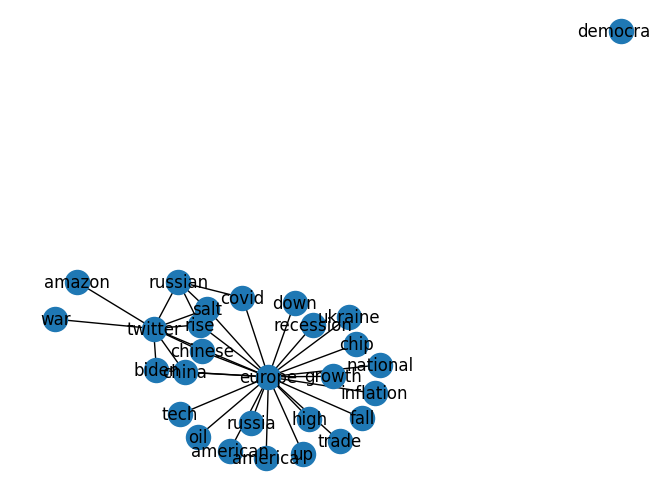

In [ ]:
import networkx as nx

causal_graph = fges_algorithm(np.array(ttt.sample(n=10,random_state=10)))


test=pd.DataFrame(causal_graph,columns=ttt.columns)
test.index=ttt.columns


G=nx.from_numpy_array(causal_graph)
node_names=dict()
for i in range(len(ttt.columns)):
  node_names[i]=ttt.columns[i]
node_names
# node_names={0:ttt.columns[0],1:ttt.columns[1],2:'biden',3:'japan',4:'china',5:'america',6:'ukraine',7:'chip'}
G=nx.relabel_nodes(G,node_names)
nx.draw(G, with_labels=True)
plt.show()

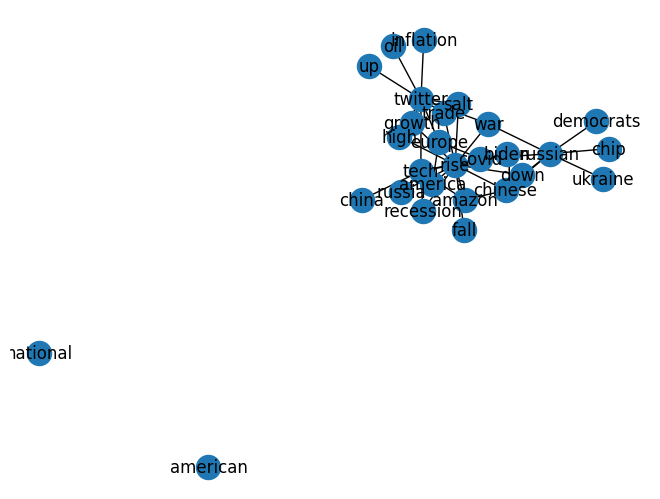

In [ ]:
causal_graph = fges_algorithm(np.array(ttt.sample(n=10,random_state=50)))


test=pd.DataFrame(causal_graph,columns=ttt.columns)
test.index=ttt.columns


G=nx.from_numpy_array(causal_graph)
node_names=dict()
for i in range(len(ttt.columns)):
  node_names[i]=ttt.columns[i]
node_names
# node_names={0:ttt.columns[0],1:ttt.columns[1],2:'biden',3:'japan',4:'china',5:'america',6:'ukraine',7:'chip'}
G=nx.relabel_nodes(G,node_names)
nx.draw(G, with_labels=True)
plt.show()

# HAN

In [ ]:
# !pip uninstall tensorflow
# !pip install tensorflow
# !pip install keras.engine

In [ ]:
import pandas as pd
import numpy as np

import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Layer
from keras import initializers as initializers, regularizers, constraints
from keras.callbacks import Callback
from keras.layers import Embedding, Input, Dense, LSTM, GRU, Bidirectional, TimeDistributed, Layer
from keras import backend as K
from keras.models import Model

from sklearn.metrics import roc_auc_score

In [ ]:
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatible with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)

class AttentionWithContext(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)


        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]


In [ ]:
MAX_WORD_LENGTH = 7
MAX_WORDS = 10
MAX_NB_CHARS = 1000
EMBEDDING_DIM = 10
VALIDATION_SPLIT = 0.15

In [ ]:
samsung[samsung['month']=='09']

,Date,Open,High,Low,Close,Adj Close,Volume,Close_prior,Close_diff,y,year,month
243,2022-09-01,495.0,495.5,490.0,490.5,474.897552,39168672.0,505.0,-14.5,0.0,2022,09
244,2022-09-02,488.0,489.5,485.0,485.0,469.572510,29982959.0,490.5,-5.5,0.0,2022,09
245,2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,09
246,2022-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,09
247,2022-09-05,485.0,488.0,484.0,486.0,470.540680,15903415.0,485.0,1.0,1.0,2022,09
248,2022-09-06,488.5,491.5,486.5,489.0,473.445221,16700285.0,486.0,3.0,1.0,2022,09
249,2022-09-07,477.0,478.0,472.0,472.5,457.470123,34678562.0,489.0,-16.5,0.0,2022,09
250,2022-09-08,473.0,475.0,472.0,475.0,459.890594,27931552.0,472.5,2.5,1.0,2022,09
251,2022-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,09
252,2022-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,09


In [ ]:
# news[['Date','title']] # 7월,8월: 훈련 데이터, 9월~10일치: 터스트 데이터
# print(news[news['Date']=='2022-07-01'].index[0])
# print(news[news['Date']=='2022-08-31'].index[-1])

18857
24429


In [ ]:
# print(news[news['Date']=='2022-09-01'].index[0])
# print(news[news['Date']=='2022-09-16'].index[-1])

24430
25868


In [ ]:
st_idx=news[news['Date']=='2022-07-01'].index[0]
end_idx=news[news['Date']=='2022-09-16'].index[-1]
t=news.iloc[st_idx:end_idx+1][['Date','title']]

In [ ]:
date_y=dict()
for d,y in zip(samsung['Date'],samsung['y']):
  date_y[d]= y

t['y']=t['Date'].apply(lambda x:date_y[x])
t

,Date,title,y
18857,2022-07-01,Google to Delete Abortion-Clinic Visits From L...,0.0
18858,2022-07-01,"New York Lawmakers Firm Up Gun, Abortion Rules...",0.0
18859,2022-07-01,Enochian Biosciences Finds Falsified Data in S...,0.0
18860,2022-07-01,Jerry Hall Files for Divorce From Rupert Murdoch,0.0
18861,2022-07-01,Biden Seeks to Block New Offshore Drilling in ...,0.0
...,...,...,...
25864,2022-09-16,"Some Monarchs Endure, but Monarchies Are in De...",0.0
25865,2022-09-16,EY’s Consulting Arm Could Struggle to Compete ...,0.0
25866,2022-09-16,"Derby’s Take: Amid Inflation Woes, Analysts Th...",0.0
25867,2022-09-16,The Ivy League Dropout Who Just Sold His Firm ...,0.0


In [ ]:
t[t['y'].isna()]['Date'].unique()

array(['2022-07-02', '2022-07-03', '2022-07-09', '2022-07-10',
       '2022-07-16', '2022-07-17', '2022-07-23', '2022-07-24',
       '2022-07-30', '2022-07-31', '2022-08-06', '2022-08-07',
       '2022-08-13', '2022-08-14', '2022-08-20', '2022-08-21',
       '2022-08-27', '2022-08-28', '2022-09-03', '2022-09-04',
       '2022-09-09', '2022-09-10', '2022-09-11'], dtype=object)

In [ ]:
off_day={'2022-07-02':'2022-07-04', '2022-07-03':'2022-07-04', #'2022-07-04':'2022-07-05',
          '2022-07-09':'2022-07-11', '2022-07-10':'2022-07-11',
         '2022-07-16':'2022-07-18', '2022-07-17':'2022-07-18',
         '2022-07-23':'2022-07-25', '2022-07-24':'2022-07-25',
         '2022-07-30':'2022-08-01','2022-07-31':'2022-08-01',
         '2022-08-06':'2022-08-08', '2022-08-07':'2022-08-08',
         '2022-08-13':'2022-08-15', '2022-08-14':'2022-08-15',
         '2022-08-20':'2022-08-22','2022-08-21':'2022-08-22',
         '2022-08-27':'2022-08-29', '2022-08-28':'2022-08-29',
         '2022-09-03':'2022-09-05','2022-09-04':'2022-09-05', #'2022-09-05':'2022-09-06',
         '2022-09-09':'2022-09-12','2022-09-10':'2022-09-12', '2022-09-11':'2022-09-12'
         }

In [ ]:
for i in t['Date']:
  if i in off_day.keys():
    t.loc[t['Date']==i,'Date']=off_day[i]
    #  ['y']=t[t['Date']==off_day[i]]['y'].values[0]

In [ ]:
t['Date'].unique()

array(['2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06',
       '2022-07-07', '2022-07-08', '2022-07-11', '2022-07-12',
       '2022-07-13', '2022-07-14', '2022-07-15', '2022-07-18',
       '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22',
       '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28',
       '2022-07-29', '2022-08-01', '2022-08-02', '2022-08-03',
       '2022-08-04', '2022-08-05', '2022-08-08', '2022-08-09',
       '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-15',
       '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19',
       '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
       '2022-08-26', '2022-08-29', '2022-08-30', '2022-08-31',
       '2022-09-01', '2022-09-02', '2022-09-05', '2022-09-06',
       '2022-09-07', '2022-09-08', '2022-09-12', '2022-09-13',
       '2022-09-14', '2022-09-15', '2022-09-16'], dtype=object)

In [ ]:
t['y']=t['Date'].apply(lambda x:date_y[x])
t

,Date,title,y
18857,2022-07-01,Google to Delete Abortion-Clinic Visits From L...,0.0
18858,2022-07-01,"New York Lawmakers Firm Up Gun, Abortion Rules...",0.0
18859,2022-07-01,Enochian Biosciences Finds Falsified Data in S...,0.0
18860,2022-07-01,Jerry Hall Files for Divorce From Rupert Murdoch,0.0
18861,2022-07-01,Biden Seeks to Block New Offshore Drilling in ...,0.0
...,...,...,...
25864,2022-09-16,"Some Monarchs Endure, but Monarchies Are in De...",0.0
25865,2022-09-16,EY’s Consulting Arm Could Struggle to Compete ...,0.0
25866,2022-09-16,"Derby’s Take: Amid Inflation Woes, Analysts Th...",0.0
25867,2022-09-16,The Ivy League Dropout Who Just Sold His Firm ...,0.0


In [ ]:
t.isna().sum()

Date     0
title    0
y        0
dtype: int64

In [ ]:
tot_dat=list(t['Date'].unique())
title_lst=[]
y_lst=[]
for dat in tot_dat:
  title_lst.append('\n'.join(t[t['Date']==dat]['title']))
  y_lst.append(list(t[t['Date']==dat]['y'].unique())[0])
t=pd.DataFrame({'Date':tot_dat, 'title':title_lst, 'y':y_lst})

In [ ]:
t.isna().sum()

Date     0
title    0
y        0
dtype: int64

In [ ]:
text=t['title']
sentences = text.apply(lambda x: x.split())


In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_CHARS, char_level=True)
tokenizer.fit_on_texts(sentences.values)

In [ ]:
data = np.zeros((len(sentences), MAX_WORDS, MAX_WORD_LENGTH), dtype='int32')

for i, words in enumerate(sentences):
    for j, word in enumerate(words):
        if j < MAX_WORDS:
            k = 0
            for _, char in enumerate(word):
                try:
                    if k < MAX_WORD_LENGTH:
                        if tokenizer.word_index[char] < MAX_NB_CHARS:
                            data[i, j, k] = tokenizer.word_index[char]
                            k=k+1
                except:
                    None
#                     print (char)


In [ ]:
char_index = tokenizer.word_index
print('Total %s unique tokens.' % len(char_index))

Total 13892 unique tokens.


In [ ]:
labels = t['y'].values
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (55, 10, 7)
Shape of label tensor: (55,)


In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

print('Number of positive and negative reviews in traing and validation set')
print (y_train.sum(axis=0))
print (y_val.sum(axis=0))


Number of positive and negative reviews in traing and validation set
24.0
3.0


In [ ]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: %d - score: %.6f \n" % (epoch+1, score))

In [ ]:
embedding_layer = Embedding(len(char_index) + 1,
                            EMBEDDING_DIM,
                            input_length=MAX_WORD_LENGTH,
                            trainable=True)

char_input = Input(shape=(MAX_WORD_LENGTH,), dtype='int32')
char_sequences = embedding_layer(char_input)
char_lstm = Bidirectional(LSTM(100, return_sequences=True))(char_sequences)
char_dense = TimeDistributed(Dense(200))(char_lstm)



char_att = AttentionWithContext()(char_dense)
charEncoder = Model(char_input, char_att)

words_input = Input(shape=(MAX_WORDS, MAX_WORD_LENGTH), dtype='int32')
words_encoder = TimeDistributed(charEncoder)(words_input)
words_lstm = Bidirectional(LSTM(100, return_sequences=True))(words_encoder)
words_dense = TimeDistributed(Dense(200))(words_lstm)
words_att = AttentionWithContext()(words_dense)
preds = Dense(1, activation='sigmoid')(words_att)
model = Model(words_input, preds)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
x_val.shape

(8, 10, 7)

In [ ]:
y_val.shape

(8,)

In [ ]:
x_train.shape

(47, 10, 7)

In [ ]:
y_train.shape

(47,)

In [ ]:
set(y_train)

{0.0, 1.0}

In [ ]:
# from tensorflow.keras.utils import to_categorical
# y_val_ = to_categorical(y_val)
# y_train_ = to_categorical(y_train)

In [ ]:
RocAuc = RocAucEvaluation(validation_data=(x_val, y_val), interval=1)
model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=1, batch_size=600,  callbacks=[RocAuc])

1/1 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.5106
 ROC-AUC - epoch: 1 - score: 0.800000 

1/1 [==============================] - 18s 18s/step - loss: 0.6931 - acc: 0.5106 - val_loss: 0.7000 - val_acc: 0.3750


In [ ]:
# 0.800000